In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("..\\data\\cleaned\\eda_df_amountpercountry.csv",index_col=0)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 355)
pd.set_option('display.max_colwidth', 300)

In [163]:
#When do they get caught?
df.groupby('country')['proven victims'].max().sort_values(ascending=False)

country
Venezuela         138
Colombia          138
Ecuador           138
Peru              110
Pakistan          100
Russia             83
Brazil             72
India              70
China              67
United States      60
Italy              58
Ukraine            53
Canada             49
Indonesia          42
South Africa       38
Morocco            36
Hungary            35
Romania            35
Serbia             35
Mexico             33
Iran               33
Iraq               33
Egypt              32
Germany            30
Swaziland          28
Greece             27
United Kingdom     26
France             23
Switzerland        23
Tajikistan         22
South Korea        21
Afghanistan        20
Costa Rica         19
Latvia             19
Turkey             18
Belgium            16
Spain              16
Argentina          15
Poland             14
Chile              14
Tunisia            13
Thailand           12
Malaysia           12
Japan              12
Nepal              12
Ye

In [165]:
df['proven victims'].sum()

6292

Text(0.5, 1.0, 'Countries with the Highest Maximum Number of Proven Victims (Single Killer)')

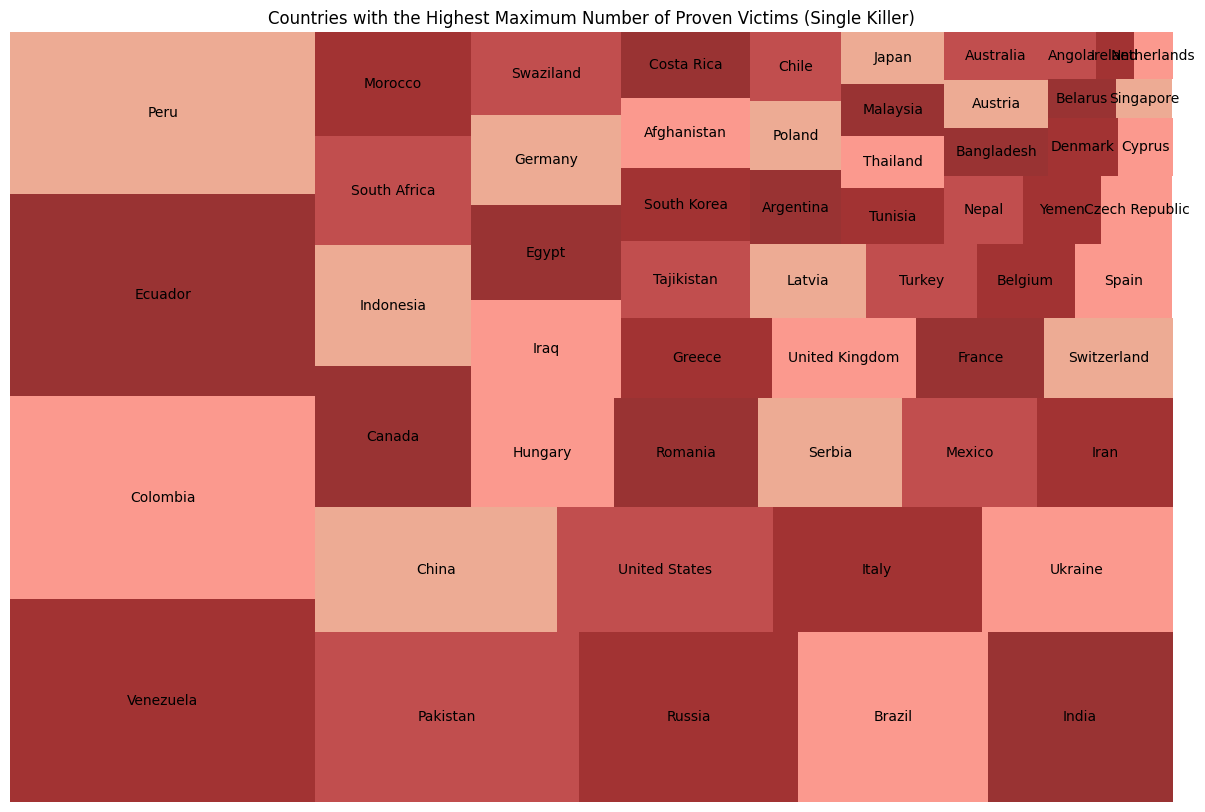

In [143]:
import squarify
plt.figure(figsize=(15,10))
squarify.plot(sizes=df.groupby('country')['proven victims'].max().sort_values(ascending=False).values, label=df.groupby('country')['proven victims'].max().sort_values(ascending=False).index, alpha=.8,color=['darkred','salmon','maroon','darksalmon','firebrick'])
plt.axis('off')
plt.title("Countries with the Highest Maximum Number of Proven Victims (Single Killer)")

In [2]:
df.head()

,name,country,years active,proven victims,possible victims,notes,pov rate,density,amount
0,Luis Garavito,Colombia,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,43.55,7
1,Luis Garavito,Ecuador,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,63.37,4
2,Luis Garavito,Venezuela,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,NaN,2
3,Pedro López,Colombia,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,43.55,7
4,Pedro López,Peru,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,23.73,2


In [117]:
#calculate the number of victims per country
victimspercountry=df.groupby('country')['proven victims'].sum().sort_values(ascending=False).reset_index()

In [118]:
victimspercountry.rename(columns={'proven victims':'country victims'},inplace=True)

In [121]:
df.head()

,name,country,years active,proven victims,possible victims,notes,pov rate,density,amount,country victims
0,Luis Garavito,Colombia,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,43.55,7,384
1,Pedro López,Colombia,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,43.55,7,384
2,Daniel Camargo Barbosa,Colombia,1974 to 1986,72,180,"Child and woman murderer, believed to have possibly raped and killed over 150 victims, primarily targeting female children as they were more likely to be virgins. Confessed to killing 72 victims. He strangled young girls in Colombia and was arrested, but he escaped from prison and he started kil...",NaN,43.55,7,384
3,Luis Gregorio Ramírez Maestre,Colombia,2010 to 2013,30,30,Killed motorists in various municipalities before his 2012 capture. Was sentenced to 34 years in prison.,NaN,43.55,7,384
4,Manuel Octavio Bermúdez,Colombia,1999 to 2003,21,50+,"Colombian pedophile and serial killer. Known as ""El Monstruo de los Cañaduzales"" (The Monster of the Cane Fields). He confessed to killing 21 children in remote areas of Colombia. Sentenced to 40 years in prison.",NaN,43.55,7,384


In [119]:
df=df.merge(victimspercountry,on='country', how='inner')

In [166]:
# df.to_csv('..\\data\\cleaned\\eda_df_victimpercountry.csv')

Text(0.5, 28.999999999999986, 'Number of killers')

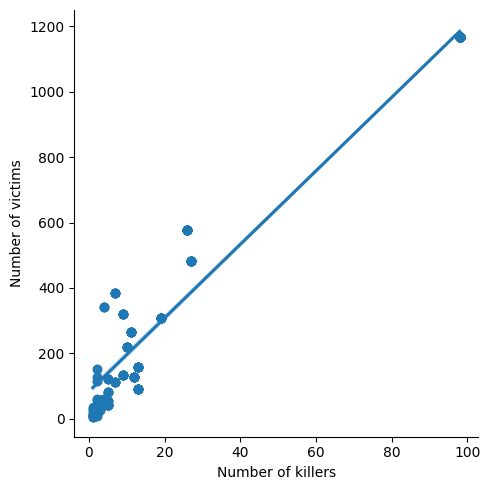

In [259]:
sns.lmplot(x='amount', y='country victims',data=df,fit_reg=True,palette='twilight')
plt.ylabel("Number of victims")
plt.axis('tight')
# plt.legend()
# leg._ncol=2
plt.xlabel('Number of killers')

Text(0.5, 36.72222222222221, 'Number of killers per country')

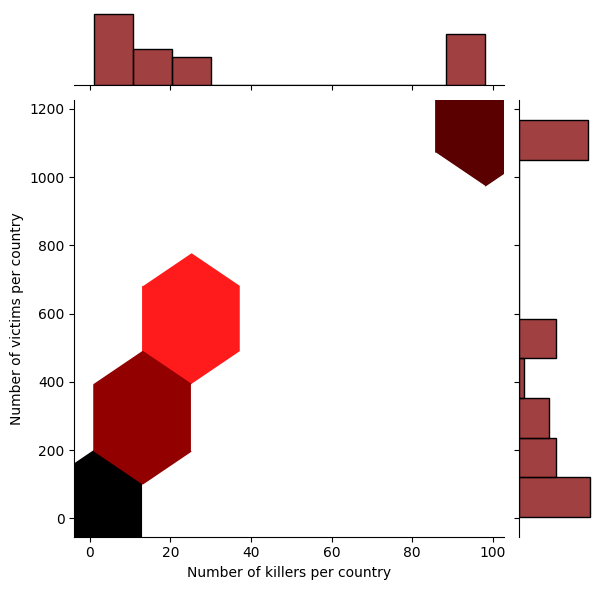

In [267]:
sns.jointplot(data=df,x='amount',y='country victims',kind='hex',color='maroon')
plt.ylabel("Number of victims per country")
plt.axis('tight')
plt.xlabel('Number of killers per country')
# plt.title('Relationship Between Nr of Victims and Killers per Country',loc='right')

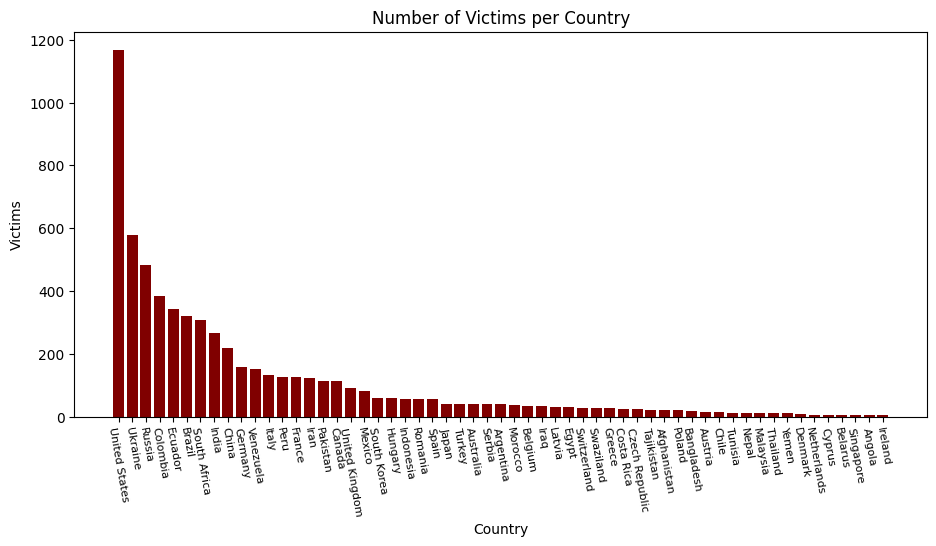

In [224]:
#HISTOGRAMA
plt.figure(figsize=(11,5));
plt.bar(victimspercountry['country'],height=victimspercountry['proven victims'],color='maroon')
plt.axis('tight');
plt.xticks(rotation=-80, fontsize=8);
plt.xlabel('Country');
plt.ylabel('Victims');
plt.title('Number of Victims per Country');

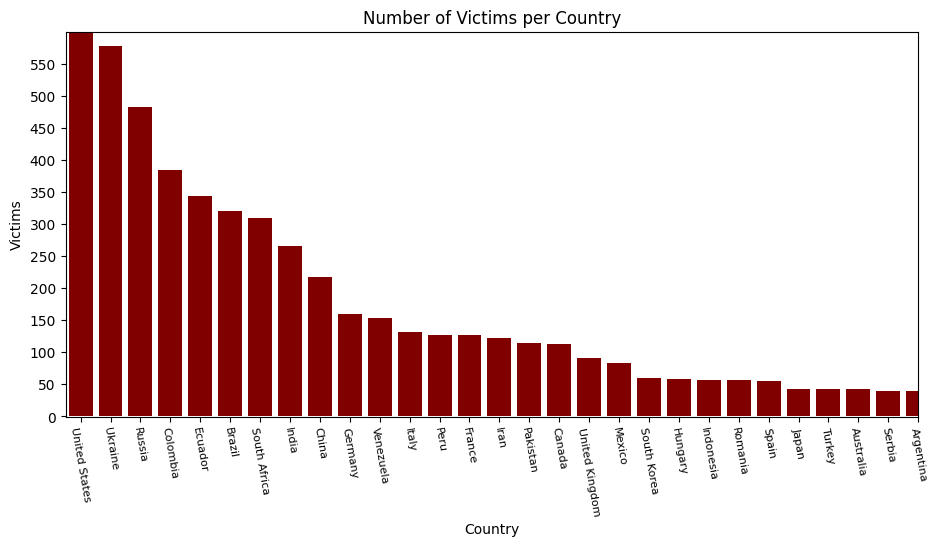

In [242]:
#zooming in
#HISTOGRAMA
plt.figure(figsize=(11,5));
plt.bar(victimspercountry['country'],height=victimspercountry['proven victims'],color='maroon')
plt.axis('tight');
plt.xticks(rotation=-80, fontsize=8);
plt.xlabel('Country');
plt.ylabel('Victims');
plt.title('Number of Victims per Country');
plt.xlim([-0.5,'Argentina'])
plt.ylim([-0.5,600]);
plt.yticks(range(0,600,50));
# plt.gca().invert_xaxis()


# ax[0]=invert_xaxis()

In [244]:
# df.sort_values(by='years active',ascending=False)
df[df['country']=='South Korea']

,name,country,years active,proven victims,possible victims,notes,pov rate,density,amount
73,Yoo Young-chul,South Korea,2003 to 2004,21,26,"Used a hammer to murder mostly older victims, until his focus shifted to the decapitation and mutilation of escorts after being dumped by a girlfriend who worked in that profession. Was sentenced to death and currently incarcerated.",0.161,NaN,4
119,Lee Choon-jae,South Korea,1986 to 1994,15,NaN,"Also known as the Hwaseong serial murders. Most of the victims were bound, gagged, and strangled to death with their own clothes. It sparked the largest criminal case in South Korea with two million officers mobilized and over 21,000 suspects investigated. A suspect was identified in 2019, but h...",0.161,NaN,4
143,Jeong Nam-gyu,South Korea,2004 to 2006,14,NaN,"Kidnapped, raped and murdered people; committed suicide.",0.161,NaN,4
233,Kang Ho-sun,South Korea,2006 to 2008,10,NaN,"Sentenced to death in 2010 for killing 10 women, including his wife and mother-in-law.",0.161,NaN,4


In [3]:
killerspercountrypovrdens=df.groupby('country')[['density','pov rate','amount']].agg({'density':'first','pov rate':'first','amount':'first'}).round(2).sort_values(by='amount', ascending=False).reset_index()
killerspercountrypovrdens
#this shows the amount of killers per country related to its density and pov rate

,country,density,pov rate,amount
0,United States,34.56,0.17,98
1,Russia,9.00,NaN,27
2,Ukraine,78.52,NaN,26
3,South Africa,43.68,NaN,19
4,Germany,231.31,0.10,13
5,United Kingdom,264.94,0.12,13
6,France,120.59,0.08,12
7,India,421.14,NaN,11
8,China,144.58,NaN,10
9,Italy,203.41,0.14,9


### Hipótesis 1. Países con alta densidad de población?

In [ ]:
df['country'][df['density']]

In [154]:
df['country'][df['density'].idxmax()]

'Singapore'

In [401]:
df.sort_values(by='density',ascending=False)

,name,country,years active,proven victims,possible victims,notes,pov rate,density,amount
320,Sek Kim Wah,Singapore,30 June 1983 to 23 July 1983,5,-,"Sek Kim Wah, who was of Chinese Singaporean descent, was 19 years old when he killed five victims in two separate robbery cases, using raffia string to strangle them. Other methods employed were hitting their heads with a heavy object (like a wooden stool) and electrocution (which was unsuccessf...",NaN,7713.14,1
280,Ershad Sikder,Bangladesh,1991 to 1999,7,43+,Career criminal and corrupt politician responsible for numerous torture murders in the 1990s; convincted on seven counts and executed 2004.,NaN,1203.00,2
210,Roshu Kha,Bangladesh,2008,11,NaN,Raped and murdered garment workers after being rejected by his lover. Sentenced to death.,NaN,1203.00,2
325,Robert Black,Netherlands,1981 to 1986,4,18+,"Convicted of kidnapping, raping and murdering four girls aged between five and 11. Suspect in other earlier child murders in the UK and other European countries. Died weeks before he was to be charged with a fifth child murder.",0.081250,498.35,2
346,Koos Hertogs,Netherlands,1979 to 1980,3,12,"Dutch serial killer convicted of abducting, torturing, raping and killing three girls. Suspected of killing a further three to nine girls and young women in the 1970s.",0.081250,498.35,2
121,Ravinder Kumar,India,2008 to 2015,15,30+,Serial rapist who killed children of poor families.,NaN,421.14,11
26,Raman Raghav,India,1965 to 1968,41,41,"In the late 1960s Raman Raghav went on a violent rampage in Mumbai, India. He bludgeoned 41 people to death inside their huts while they slept. Died of kidney failure in 1995.",NaN,421.14,11
54,The Stoneman,India,1985 to 1989,25,25+,"12 homeless people were murdered in their sleep in Bombay between 1985 and 1987, and 13 in Calcutta in 1989—in all cases, by dropping a large rock over their head (an additional victim escaped, but could not identify the attacker). No one was ever charged with any of the murders.",NaN,421.14,11
99,Darbara Singh,India,2004,17,23,Sexually assaulted and then murdered children of non-Punjabi immigrants; died in 2018 from an illness while serving a life sentence.,NaN,421.14,11
78,Mohan Kumar,India,2005 to 2009,20,20,"Lured female victims with promises of marriage and gave them cyanide, claiming they were contraceptive pills, Sentenced to death in 2013.",NaN,421.14,11


In [169]:
# df[df['density']>df['density'].median()].sort_values(by='density',ascending=False)

In [177]:
df[df['density'].notnull()]

,name,country,years active,proven victims,possible victims,notes,pov rate,density,amount
0,Luis Garavito,Colombia,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,43.55,7
1,Luis Garavito,Ecuador,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,63.37,4
3,Pedro López,Colombia,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,43.55,7
4,Pedro López,Peru,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,23.73,2
5,Pedro López,Ecuador,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,63.37,4
6,Javed Iqbal,Pakistan,1998 to 1999,100,100,"Child-murderer and rapist, known as ""Kukri"", Iqbal murdered 100 street children by strangling them and covering up his crimes by dissolving the bodies with acid. He was arrested in 1999 thanks to a letter he sent to a newspaper, and was set to be executed in the manner described by the judge who...",NaN,236.28,2
7,Mikhail Popkov,Russia,1992 to 2010,83,83+,"Serial rapist-killer nicknamed ""The Werewolf"", who was active for two decades in Angarsk, Irkutsk and Vladivostok. After being convicted of 22 murders in 2015, he confessed to an additional 59 murders, of which he was convicted of 56 in 2018. In July 2020, Popkov confessed to more killings, brin...",NaN,9.00,27
8,Daniel Camargo Barbosa,Colombia,1974 to 1986,72,180,"Child and woman murderer, believed to have possibly raped and killed over 150 victims, primarily targeting female children as they were more likely to be virgins. Confessed to killing 72 victims. He strangled young girls in Colombia and was arrested, but he escaped from prison and he started kil...",NaN,43.55,7
9,Daniel Camargo Barbosa,Ecuador,1974 to 1986,72,180,"Child and woman murderer, believed to have possibly raped and killed over 150 victims, primarily targeting female children as they were more likely to be virgins. Confessed to killing 72 victims. He strangled young girls in Colombia and was arrested, but he escaped from prison and he started kil...",NaN,63.37,4
10,Daniel Camargo Barbosa,Brazil,1974 to 1986,72,180,"Child and woman murderer, believed to have possibly raped and killed over 150 victims, primarily targeting female children as they were more likely to be virgins. Confessed to killing 72 victims. He strangled young girls in Colombia and was arrested, but he escaped from prison and he started kil...",NaN,23.97,9


In [205]:
df[df['density'].notnull()].sort_values('density')

,name,country,years active,proven victims,possible victims,notes,pov rate,density,amount
301,John Wayne Glover,Australia,1989 to 1990,6,13,"British ex-pat living in Australia. Known by the media as ""The Granny Killer"" as he targeted elderly women; committed suicide while in prison in 2005.",0.125000,3.01,5
188,John Bunting,Australia,1992 to 1999,11,NaN,Ringleader in the Snowtown murders (aka Bodies in the Barrels Murders); sentenced to 11 consecutive life sentences without the possibility of parole.,0.125000,3.01,5
227,Robert Wagner,Australia,1992 to 1999,10,NaN,Secondary ringleader in the Snowtown murders and best friend of John Justin Bunting; sentenced to 10 consecutive life sentences without the possibility of parole.,0.125000,3.01,5
262,Eric Edgar Cooke,Australia,1958 to 1963,8,Unknown,"Known as the ""Night Caller"" and later the ""Nedlands Monster""; killed at least eight people and attempted to kill at least fourteen in and around Perth between 1959 and 1963; he was last person to be hanged in Western Australia.",0.125000,3.01,5
281,Ivan Milat,Australia,1990s,7,23–37,Convicted of the Backpacker murders; sentenced to seven consecutive life sentences plus 18 years without the possibility of parole. May have had accomplices.,0.125000,3.01,5
65,Earle Nelson,Canada,1926 to 1927,22,25,"Necrophiliac who primarily targeted boarding house landladies on the US West Coast during 1926; he was also known as ""Gorilla Killer"" or ""the Dark Strangler"". Captured after two murders in a small (now ghost) town in southern Manitoba. Found guilty, hanged by Canadian authorities in January 1928.",0.106333,3.87,7
21,Willy Pickton,Canada,1983 to 2002,49,49,"Nicknamed ""The Butcher""; Robert Pickton was a Canadian serial killer who killed 49 women and disposed of their bodies by feeding them to his pigs. He was convicted of only 6 murders but charged for his proven 49 victims. Unfortunately, much to the anger of the victims families, the remaining 43 ...",0.106333,3.87,7
282,Michael Wayne McGray,Canada,1980s to 2010s,7,18,"Convicted of the murder of six people in the late 1990s, including a woman and her 11-year-old daughter. Claims to have killed 11 others, including murders committed while on parole and while on a three-day pass from prison. Finally imprisoned for life, killed a cellmate in 2010.",0.106333,3.87,7
199,Clifford Olson,Canada,1980 to 1981,11,NaN,"Considered a dangerous offender, meaning that Olson could never have been released from prison. He had three parole applications rejected. Died from cancer in 2011.",0.106333,3.87,7
274,Bruce McArthur,Canada,2010 to 2017,8,NaN,"One of the oldest known serial killers, active at 65, he lured men to secret sexual encounters involving drugs and bondage, killed them and dismembered their bodies which he hid in garden planters.",0.106333,3.87,7


In [209]:
df.head()

,name,country,years active,proven victims,possible victims,notes,pov rate,density,amount
0,Luis Garavito,Colombia,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,43.55,7
1,Luis Garavito,Ecuador,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,63.37,4
2,Luis Garavito,Venezuela,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,NaN,2
3,Pedro López,Colombia,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,43.55,7
4,Pedro López,Peru,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,23.73,2


In [108]:
#correlation matrix (same for pov rate not null)
dfcorr=(df[['proven victims','pov rate','density','amount']][(df['pov rate'].notnull())&(df['density'].notnull()) ]).corr()
dfcorr

,proven victims,pov rate,density,amount
proven victims,1.000000,0.063087,-0.118119,-0.006500
pov rate,0.063087,1.000000,-0.555718,0.744970
density,-0.118119,-0.555718,1.000000,-0.622224
amount,-0.006500,0.744970,-0.622224,1.000000


Hay una clara correlación (0.75) entre el índice de pobreza y el número de asesinos en serie de un país.

Text(0.5, 1.0, 'Serial killer demographic heatmap')

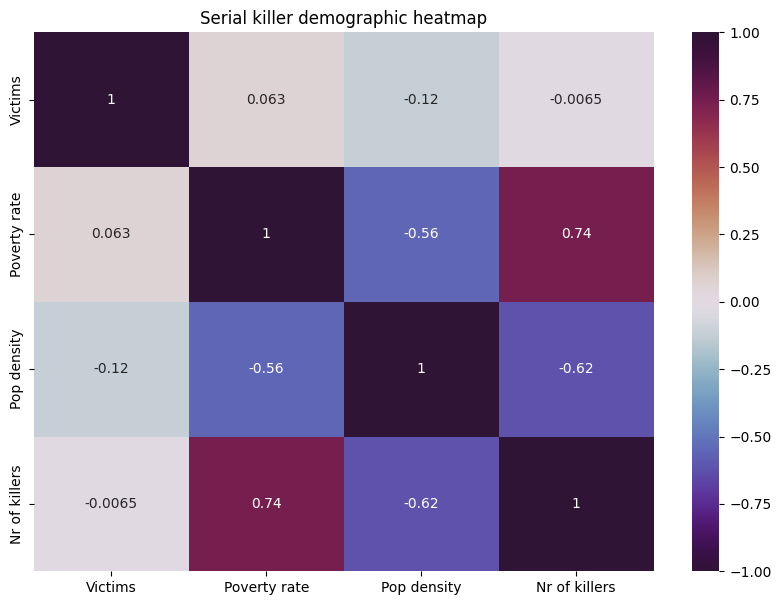

In [111]:
plt.figure(figsize=(10,7))
sns.heatmap(dfcorr,
            vmin=-1,
            vmax=1,
            cmap='twilight_shifted',
            square=False,
            annot=True,
            xticklabels=['Victims','Poverty rate','Pop density', 'Nr of killers'],
            yticklabels=['Victims','Poverty rate','Pop density', 'Nr of killers']
            );
plt.title('Serial killer demographic heatmap')


In [400]:
df[df['country']=='Spain']

,name,country,years active,proven victims,possible victims,notes,pov rate,density,amount
110,José Antonio Rodríguez Vega,Spain,1987 to 1988,16,16+,"Nicknamed El Mataviejas (The Old Lady Killer), he raped and killed at least 16 elderly women, aged from 61 to 93 years old, in and around Santander, Cantabria. He went unrecognized for over a year because he moved his victims into their beds after they were killed; no autopsies were made and the...",0.147667,93.52,5
186,Enriqueta Martí,Spain,c.1900 to 1912,12,Unknown,"Self-proclaimed witch that abducted, prostituted, murdered and made potions with the bodies of small children that she sold in Barcelona. Remains of 12 different children were identified in her home, but she is believed to have murdered more. Murdered in prison by fellow immates while awaiting t...",0.147667,93.52,5
204,Francisco García Escalero,Spain,1987 to 1994,11,NaN,"Known as ""The Killer Beggar"". A necrophilic, schizophrenic homeless man found insane and confined to a psychiatric hospital after killing 11 prostitutes and other homeless people between 1987 and 1994. Died in 2014.",0.147667,93.52,5
242,Volker Eckert,Spain,1974 to 2006,9,19+,"German trucker who confessed to having abducted, tortured and killed five prostitutes through his route in Western Europe, plus strangling a 14-year-old girl in his native West Germany in 1974, when he was 15. Police considered him perpetrator of nine murders (with four more being possible); he ...",0.147667,93.52,5
277,Manuel Delgado Villegas,Spain,1964 to 1971,7,48,"Wandering criminal known as El Arropiero (""The Arrope Trader"") and El Estrangulador del Puerto (""The Strangler of Puerto""). Confessed to the impulsive murders of 48 people of different sex, age, wealth and sexual orientation in three countries (including his girlfriend, whom he strangled during ...",0.147667,93.52,5


Parece que hay una correlación positiva entre el índice de pobreza y el número de asesinos de un país.

Por otra parte, hay una correlación negativa débil entre el la densidad y el número de asesinos (así como entre el índice de pobreza y la densidad, aunque eso no afecta al estudio).

(0.0, 550.0)

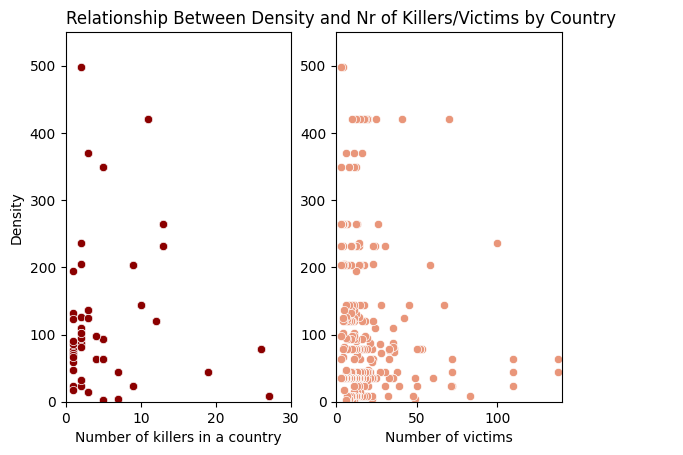

In [176]:
plt.subplot(1,2,1)
plt.title('Relationship Between Density and Nr of Killers/Victims by Country', loc='left')
sns.scatterplot(x='amount', y='density', data=df[df['density'].notnull()],color='darkred')
plt.xlim(0,30)
plt.ylim(0,550)
plt.xlabel('Number of killers in a country')
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.scatterplot(x='proven victims', y='density', color='darksalmon',data=df[df['density'].notnull()])
plt.ylabel("")
plt.xlabel('Number of victims')
plt.xlim(0,140)
plt.ylim(0,550)
#left outliers out of the plot

In [168]:
# # plt.subplot(1,2,1)
# sns.lmplot(x='amount', y='density', data=df[df['density'].notnull()],hue='country',fit_reg=False)
# # plt.xlim(0,30)
# plt.title('Relationship Between Density and Nr of Killers/Victims by Country', loc='left')
# plt.ylim(0,1000)
# plt.xlabel('Number of killers in a country')
# plt.ylabel('Density')

# # plt.subplot(1,2,2)
# sns.lmplot(x='proven victims', y='density',data=df[df['density'].notnull()],hue='country',fit_reg=False)
# plt.ylabel("")
# plt.xlabel('Number of victims')
# # plt.xlim(0,140)
# plt.ylim(0,1000)
# #left outliers out of the plot

### Hipótesis 2. Clases socioeconómicas bajas?


In [ ]:
#pov rate and country based on number of victims
df.groupby('proven victims')[['pov rate','country','amount']].agg({'pov rate':['mean','max','min'],'amount':['mean','max','min'],'country': 'first'}).reset_index().sort_values(by=('proven victims'),ascending=False)

In [187]:
scattpov=df[df['pov rate'].notnull()]
scattpov.drop_duplicates(subset='country',inplace=True)

C:\Users\Agui\AppData\Local\Temp\ipykernel_14908\1544530943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scattpov.drop_duplicates(subset='country',inplace=True)


(0.05, 0.225)

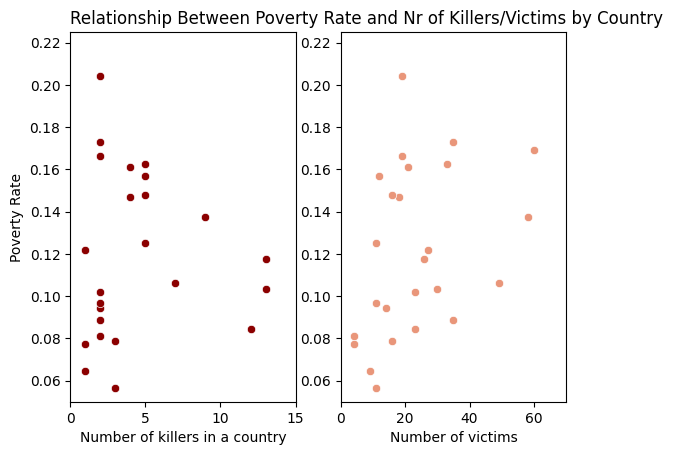

In [192]:
plt.subplot(1,2,1)
plt.title('Relationship Between Poverty Rate and Nr of Killers/Victims by Country  ', loc='left')
sns.scatterplot(x='amount', y='pov rate', data=scattpov,color='darkred')
plt.xlim(0,15)
plt.ylim(0.05,0.225)
plt.xlabel('Number of killers in a country')
plt.ylabel('Poverty Rate')

plt.subplot(1,2,2)
sns.scatterplot(x='proven victims', y='pov rate', color='darksalmon',data=scattpov)
plt.xlabel('Number of victims')
plt.ylabel('')
plt.xlim(0,70)
plt.ylim(0.05,0.225)

Tomamos EE.UU. como un outlier en cuanto a número de asesinos por país, así que lo excluímos de la gráfica.

### Hipótesis 3. ¿Son más comunes en **América y Europa**?

In [62]:
(df['country']== 'United States').value_counts() #98 from USA out of 355
#pie chart

country
False    257
True      98
Name: count, dtype: int64

In [71]:
df['country'].value_counts(ascending=False)
#box plot with quartiles

country
United States     98
Russia            27
Ukraine           26
South Africa      19
United Kingdom    13
Germany           13
France            12
India             11
China             10
Brazil             9
Italy              9
Colombia           7
Canada             7
Iran               5
Mexico             5
Spain              5
Australia          5
Japan              5
South Korea        4
Turkey             4
Ecuador            4
Argentina          3
Indonesia          3
Belgium            3
Czech Republic     3
Poland             2
Austria            2
Latvia             2
Bangladesh         2
Costa Rica         2
Switzerland        2
Netherlands        2
Romania            2
Hungary            2
Serbia             2
Venezuela          2
Peru               2
Pakistan           2
Ireland            1
Singapore          1
Angola             1
Belarus            1
Cyprus             1
Denmark            1
Morocco            1
Afghanistan        1
Tajikistan         1
Malay

In [193]:
df.columns

Index(['name', 'country', 'years active', 'proven victims', 'possible victims',
       'notes', 'pov rate', 'density', 'amount'],
      dtype='object')

In [78]:
us=len(df[df['country']=='United States'])
sa=len(df[df['country']=='South Africa'])
ukr=len(df[df['country']=='Ukraine'])
ru=len(df[df['country']=='Russia'])
other=len(df)-(us+sa+ukr+ru)

piecountries=pd.DataFrame(data={'country': ['United States','South Africa','Ukraine','Russia','Other'],
      'amount':[us,sa,ukr,ru,other]})

In [60]:
len(piecountries)

57

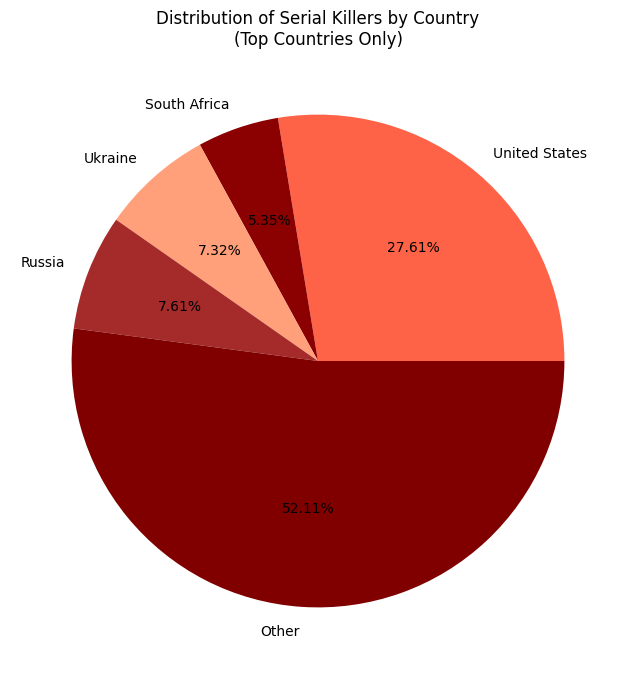

In [79]:
plt.figure(figsize=(8,8))
plt.pie((piecountries['amount']),
        labels=piecountries['country'],
        autopct='%1.2f%%',
        colors=['tomato','darkred','lightsalmon','brown','maroon'])

plt.title('Distribution of Serial Killers by Country\n(Top Countries Only)');

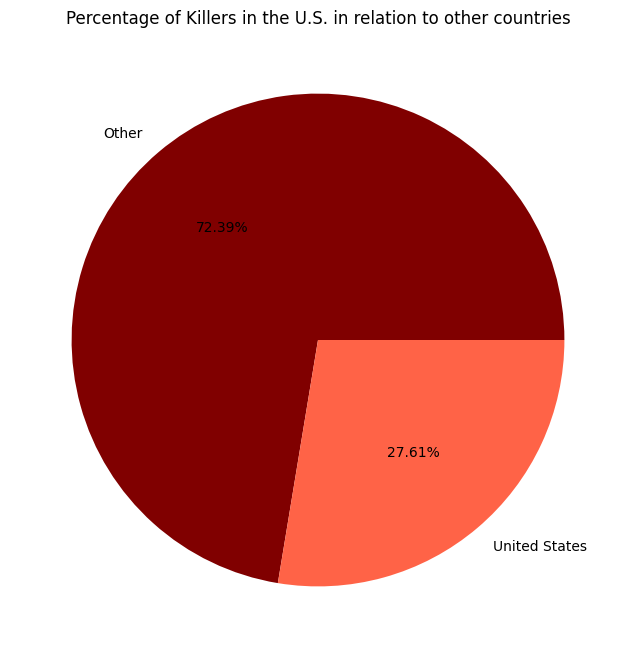

In [84]:
plt.figure(figsize=(8,8))
plt.pie((df['country']== 'United States').value_counts(),
        labels=['Other','United States'],
        autopct='%1.2f%%',
        colors=['maroon','tomato'])

plt.title('Percentage of Killers in the U.S. in relation to other countries');

### Hipótesis 4. ¿En qué países están los que más asesinatos cometen?

Histograma

In [7]:
killerspercountry=df.groupby('country')['name'].count().sort_values(ascending=False).reset_index()
#asesinos por país (ya en columna 'amount')

In [113]:
# #distplot de amount<5
# distplotsmall=df[['country','amount']][df['amount']<5].sort_values(by='amount',ascending=False)

# plt.figure(figsize=(6,15));
# sns.displot(distplotsmall['country'],color='darkred');
# plt.axis('tight');
# plt.xticks(rotation=90,fontsize=7.5);
# plt.xlabel('Country');
# plt.ylabel('Number of killers');
# plt.title('Number of Killers per Country');
# plt.yticks(range(0,101,25))

In [19]:
distplot4=df[['country','amount']][df['amount']>4].sort_values(by='amount',ascending=False)

([<matplotlib.axis.YTick at 0x1f6c8cdbd50>,
 [Text(0, 0, '0'),
  Text(0, 25, '25'),
  Text(0, 50, '50'),
  Text(0, 75, '75'),
  Text(0, 100, '100')])

<Figure size 600x1000 with 0 Axes>

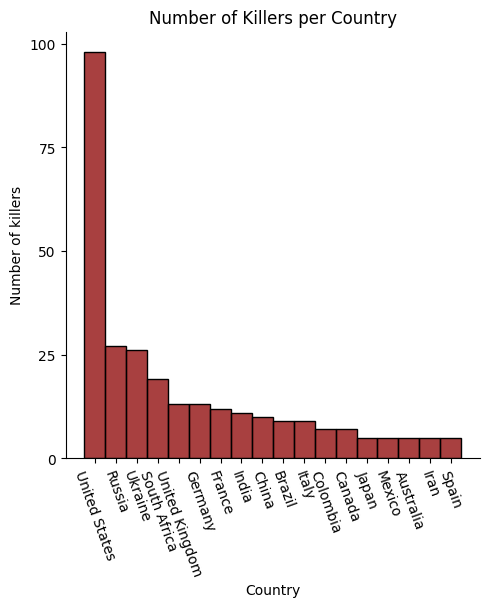

In [137]:
#HISTOGRAMA
plt.figure(figsize=(6,10));
sns.displot(distplot4['country'],color='darkred');
plt.axis('tight');
plt.xticks(rotation=-70);
plt.xlabel('Country');
plt.ylabel('Number of killers');
plt.title('Number of Killers per Country');
plt.yticks(range(0,101,25))


<Figure size 500x900 with 0 Axes>

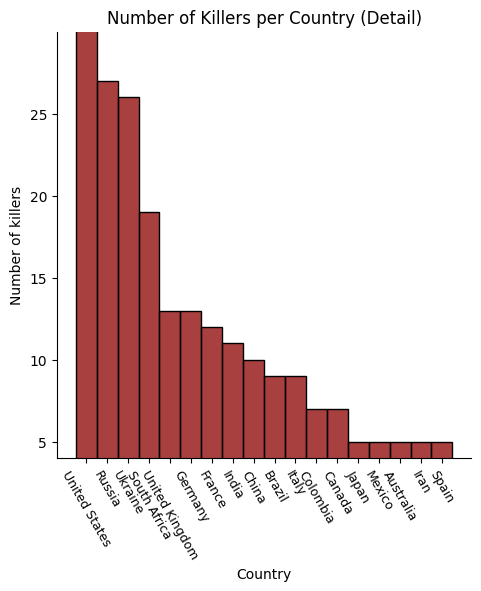

In [47]:
#repeat with more zoom
plt.figure(figsize=(5,9))
sns.displot(distplot4['country'],color='darkred')
plt.axis('tight')
plt.xticks(rotation=-60,fontsize=9);
plt.ylim(4,30)
plt.yticks(range(5,30,5))

plt.xlabel('Country');
plt.ylabel('Number of killers');
plt.title('Number of Killers per Country (Detail)');

Boxplot

In [27]:
df['amount'].agg(['median','mean','max','min'])
#98 es un outlier q descompensa la media
#boxplot p/ ver outlier

median    13.000000
mean      35.529577
max       98.000000
min        1.000000
Name: amount, dtype: float64

0            Colombia
1             Ecuador
2           Venezuela
3            Colombia
4                Peru
5             Ecuador
6            Pakistan
7              Russia
8            Colombia
9             Ecuador
10             Brazil
11             Brazil
12              India
13              China
14      United States
15              Italy
16            Ukraine
17            Ukraine
18            Ukraine
19            Ukraine
20             Brazil
21             Canada
22      United States
23             Russia
24              China
25          Indonesia
26              India
27             Brazil
28       South Africa
29            Ukraine
30            Ukraine
31            Ukraine
32            Morocco
33            Romania
34             Serbia
35            Hungary
36      United States
37      United States
38      United States
39               Iran
40               Iraq
41               Iran
42            Ukraine
43             Mexico
44              Egypt
45        

In [28]:
df[df['proven victims']>30].sort_values(by='proven victims',ascending=False)

,name,country,years active,proven victims,possible victims,notes,pov rate,density,amount
0,Luis Garavito,Colombia,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,43.55,7
1,Luis Garavito,Ecuador,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,63.37,4
2,Luis Garavito,Venezuela,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,NaN,2
3,Pedro López,Colombia,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,43.55,7
4,Pedro López,Peru,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,23.73,2
5,Pedro López,Ecuador,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,63.37,4
6,Javed Iqbal,Pakistan,1998 to 1999,100,100,"Child-murderer and rapist, known as ""Kukri"", Iqbal murdered 100 street children by strangling them and covering up his crimes by dissolving the bodies with acid. He was arrested in 1999 thanks to a letter he sent to a newspaper, and was set to be executed in the manner described by the judge who...",NaN,236.28,2
7,Mikhail Popkov,Russia,1992 to 2010,83,83+,"Serial rapist-killer nicknamed ""The Werewolf"", who was active for two decades in Angarsk, Irkutsk and Vladivostok. After being convicted of 22 murders in 2015, he confessed to an additional 59 murders, of which he was convicted of 56 in 2018. In July 2020, Popkov confessed to more killings, brin...",NaN,9.00,27
8,Daniel Camargo Barbosa,Colombia,1974 to 1986,72,180,"Child and woman murderer, believed to have possibly raped and killed over 150 victims, primarily targeting female children as they were more likely to be virgins. Confessed to killing 72 victims. He strangled young girls in Colombia and was arrested, but he escaped from prison and he started kil...",NaN,43.55,7
9,Daniel Camargo Barbosa,Ecuador,1974 to 1986,72,180,"Child and woman murderer, believed to have possibly raped and killed over 150 victims, primarily targeting female children as they were more likely to be virgins. Confessed to killing 72 victims. He strangled young girls in Colombia and was arrested, but he escaped from prison and he started kil...",NaN,63.37,4


Text(58.347222222222214, 0.5, 'Number of victims')

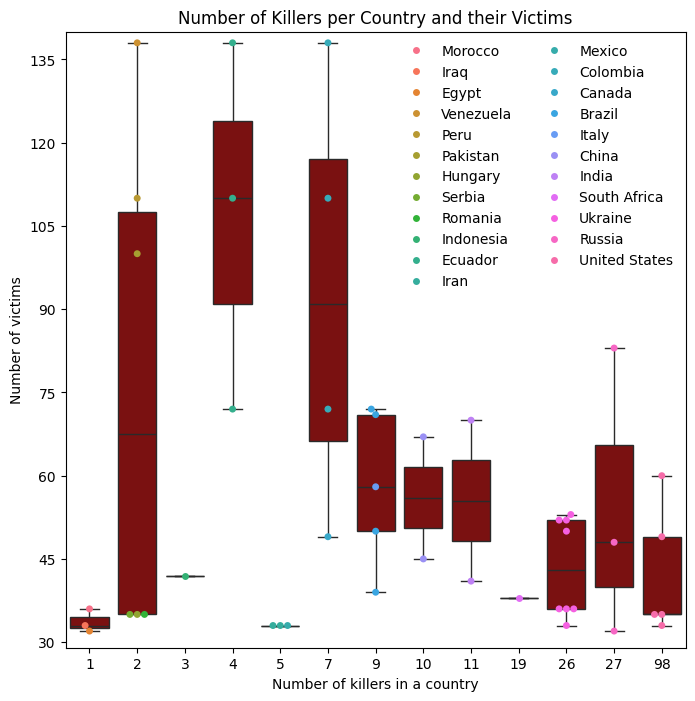

In [138]:
plt.figure(figsize=(8,8))
sns.boxplot(data=(df[df['proven victims']>30].sort_values(by='proven victims',ascending=False)), x='amount',y='proven victims',color='darkred');
sns.swarmplot(data=(df[df['proven victims']>30].sort_values(by='proven victims',ascending=False)), x='amount',y='proven victims', hue='country');#, color='lightgray');
# plt.xticks(rotation=90);
plt.legend(loc = 'upper right', frameon = False, ncol = 2)
plt.ylim(29,140)
plt.yticks(range(30,141,15))
plt.title('Number of Killers per Country and their Victims')
plt.xlabel('Number of killers in a country')
plt.ylabel('Number of victims')

In [29]:
USACOL=df[(df['country']=='United States')|(df['country']=='Colombia')]
USACOL

,name,country,years active,proven victims,possible victims,notes,pov rate,density,amount
0,Luis Garavito,Colombia,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,43.55,7
3,Pedro López,Colombia,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,43.55,7
8,Daniel Camargo Barbosa,Colombia,1974 to 1986,72,180,"Child and woman murderer, believed to have possibly raped and killed over 150 victims, primarily targeting female children as they were more likely to be virgins. Confessed to killing 72 victims. He strangled young girls in Colombia and was arrested, but he escaped from prison and he started kil...",NaN,43.55,7
14,Samuel Little,United States,1970 to 2005,60,93,"Was convicted of killing three women, but later investigations linked 31 other murders to him. Little is now thought to be America's most prolific serial killer. He claimed he killed as many as 93 victims total, three above his initial confession of 90, the FBI later confirmed a total of 50 murd...",0.169,34.56,98
22,Gary Ridgway,United States,1982 to 2000,49,71–90+,"Truck painter who confessed to killing 71 women. Also known as The Green River Killer. He almost exclusively targeted sex workers from Seattle. Suspected of killing over 90 victims, confessed to 71, convicted of 49. Sentenced to life without parole.",0.169,34.56,98
36,Ted Bundy,United States,1974 to 1978,35,36–100+,"American serial killer known for his charisma and good looks. Bundy officially confessed to 30 homicides, but had confessed to killing 35–36 women in the past, and some estimates run upwards of 100 or more. Infamous for escaping from prison twice and murdering multiple victims in one day; someti...",0.169,34.56,98
37,Clementine Barnabet,United States,1911,35,35,An axe murdering voodoo priestess who murdered African-American families at nighttime. Was released in 1923.,0.169,34.56,98
38,John Wayne Gacy,United States,1972 to 1978,33,34+,"Known to have murdered a minimum of 33 teenage boys and young men between 1972 and 1978, 26 of whom he buried in the crawl space of his Chicago home. Gacy was known as the ""Killer Clown"" due to the fact he often entertained children at social events dressed in a self devised clown costume. Execu...",0.169,34.56,98
48,Luis Gregorio Ramírez Maestre,Colombia,2010 to 2013,30,30,Killed motorists in various municipalities before his 2012 capture. Was sentenced to 34 years in prison.,NaN,43.55,7
55,Juan Corona,United States,1971,25,25+,Corona was convicted of murdering ranch laborers and burying them in orchards. He was sentenced to 25 terms life imprisonment. Died from natural causes in 2019.,0.169,34.56,98


Text(55.597222222222214, 0.5, 'Number of victims')

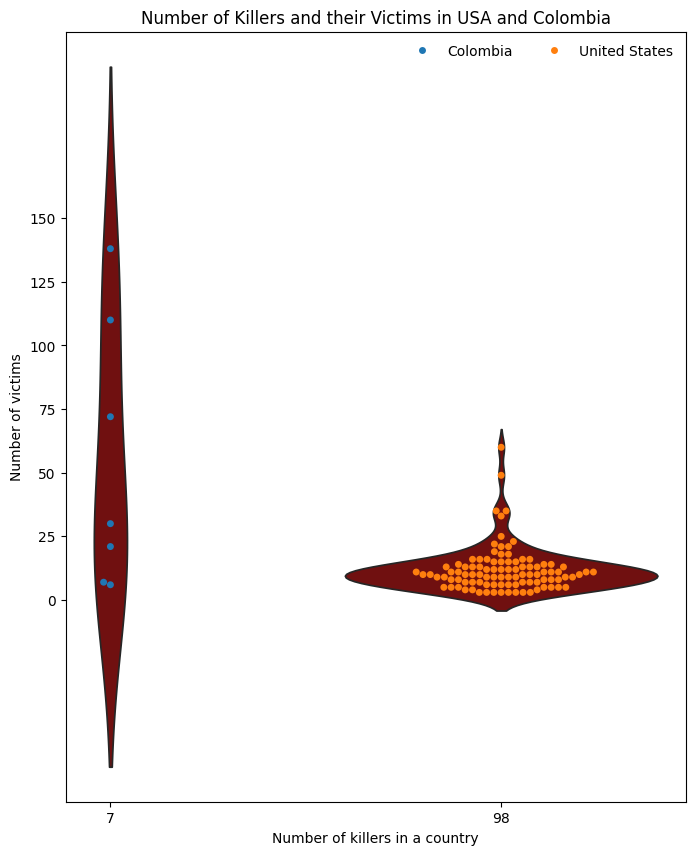

In [34]:
plt.figure(figsize=(8,10))
sns.violinplot(data=(USACOL.sort_values(by='proven victims',ascending=False)), x='amount',y='proven victims',color='maroon',inner=None);
sns.swarmplot(data=(USACOL.sort_values(by='proven victims',ascending=False)), x='amount',y='proven victims', hue='country');#, color='lightgray');
# plt.xticks(rotation=90);
plt.legend(loc = 'upper right', frameon = False, ncol = 2)
plt.ylim(-60,220)
plt.yticks(range(0,151,25))
plt.axis('tight')
# plt.yticks(range(30,141,15))
plt.title('Number of Killers and their Victims in USA and Colombia')
plt.xlabel('Number of killers in a country')
plt.ylabel('Number of victims')

C:\Users\Agui\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(58.347222222222214, 0.5, 'Number of victims')

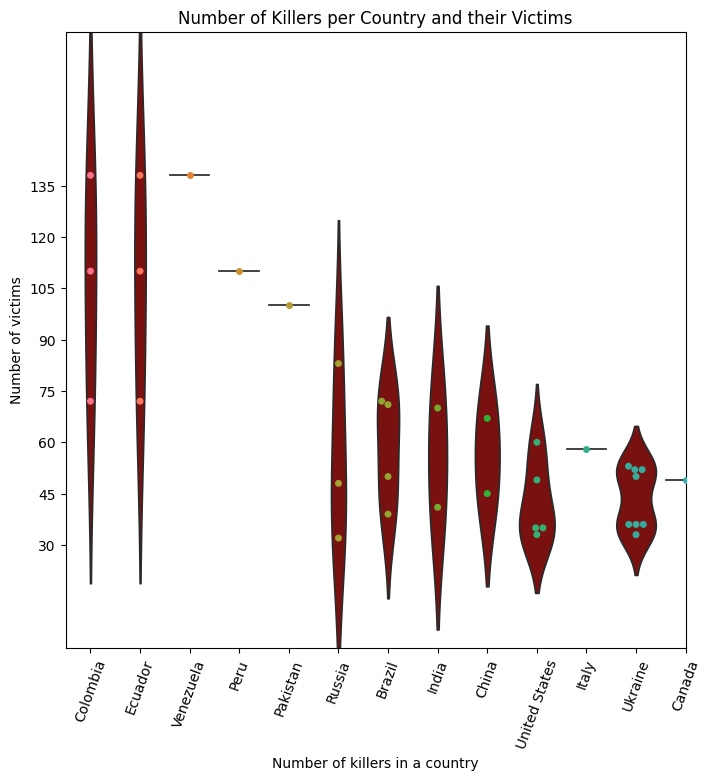

In [143]:
plt.figure(figsize=(8,8))
sns.violinplot(data=(df[df['proven victims']>30].sort_values(by='proven victims',ascending=False)), x='country',y='proven victims',color='darkred',inner=None);
sns.swarmplot(data=(df[df['proven victims']>30].sort_values(by='proven victims',ascending=False)), x='country',y='proven victims', hue='country');#, color='lightgray');
plt.xticks(rotation=70);
plt.xlim(-0.5,'Canada')
plt.legend(loc = 'upper right', frameon = False, ncol = 2)
plt.ylim(0,180)
plt.yticks(range(30,141,15))
plt.title('Number of Killers per Country and their Victims')
plt.xlabel('Number of killers in a country')
plt.ylabel('Number of victims')

In [116]:
df.head()

,name,country,years active,proven victims,possible victims,notes,pov rate,density,amount
0,Luis Garavito,Colombia,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,43.55,7
1,Luis Garavito,Ecuador,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,63.37,4
2,Luis Garavito,Venezuela,1992 to 1999,138,172–300+,"Child-murderer, torture-killer, and rapist known as ""La Bestia"" (""The Beast""). Confessed to killing 140 boys between eight and 16 years old over a seven-year period in Colombia and neighboring countries. He is suspected of murdering over 300 victims, mostly street children. Garavito was original...",NaN,NaN,2
3,Pedro López,Colombia,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,43.55,7
4,Pedro López,Peru,1969 to 1979,110,300+,"Child-murderer and rapist, known as ""The Monster of the Andes"". Targeted young girls, between the ages of eight and 12. Arrested in 1980 and convicted in 1983 of killing three young girls, but claimed to have killed hundreds. Despite being believed to be one of the most prolific serial killers o...",NaN,23.73,2


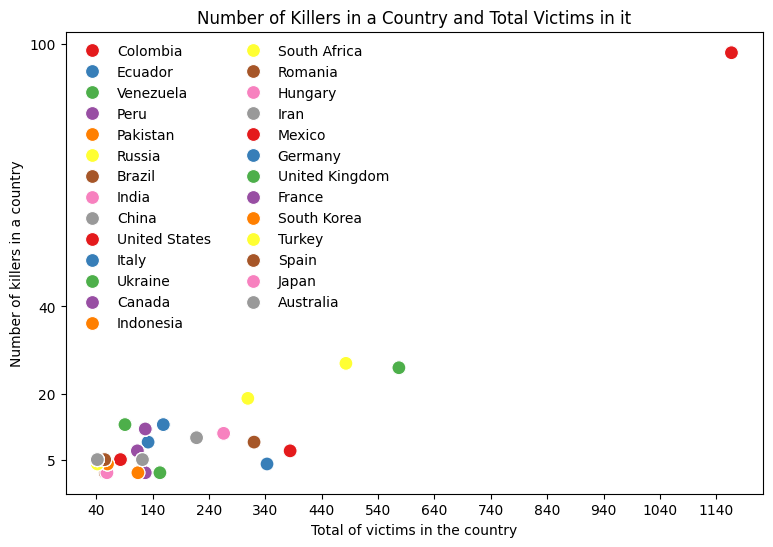

In [142]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df[df['country victims']>40],#.sort_values(by='country',ascending=True),
                x='country victims',
                y='amount',
                hue = 'country',
                palette='Set1',
                s=100);
# plt.ylim(0,100)
plt.yticks([5,20,40,100])
plt.xticks(range(40,1200,100))

plt.title('Number of Killers in a Country and Total Victims in it')
plt.ylabel('Number of killers in a country')
plt.xlabel('Total of victims in the country')
plt.legend(loc = 'upper left', frameon = False, ncol = 2)

In [132]:
# plt.figure(figsize=(9,6))
# sns.lmplot(data=df[df['proven victims']>40].sort_values(by='country',ascending=True),
#                 x='proven victims',
#                 y='amount',
#                 hue = 'country',
#                 palette='dark',
#                 fit_reg=False);
# plt.ylim(0,100)
# plt.yticks([0,5,20,40,80,100])
# plt.gca().invert_xaxis()
# plt.xticks(range(40,141,20))

# plt.title('Number of Killers in a Country and their Victims')
# plt.ylabel('Number of killers in a country')
# plt.xlabel('Number of victims')
# plt.legend(loc = 'upper left', frameon = False, ncol = 2)

Text(0.5, 36.72222222222221, 'Total of victims in the country')

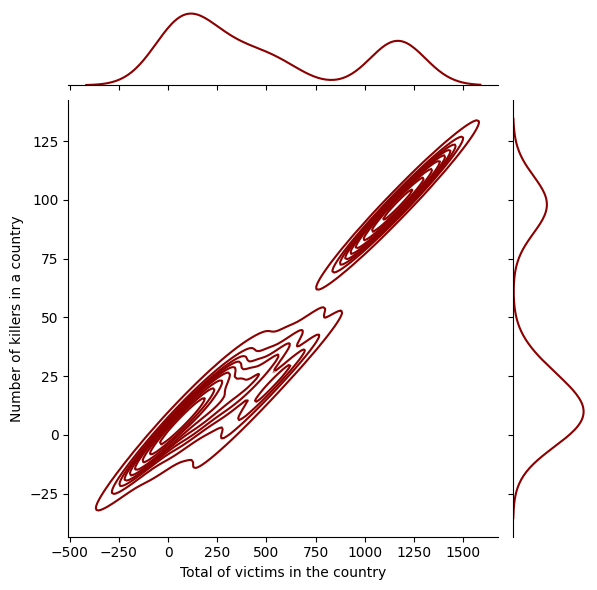

In [136]:
sns.jointplot(x=df['country victims'],
              y=df['amount'],
              kind="kde",
              color="darkred");
plt.axis('tight')
# plt.yticks([5,20,40,100])
# plt.xticks(range(40,1200,100))

# plt.title('Number of Killers in a Country and Total Victims in it')
plt.ylabel('Number of killers in a country')
plt.xlabel('Total of victims in the country')

C:\Users\Agui\AppData\Local\Temp\ipykernel_14908\3101444057.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[['proven victims','amount']], shade=True);


(0.0, 1000.0)

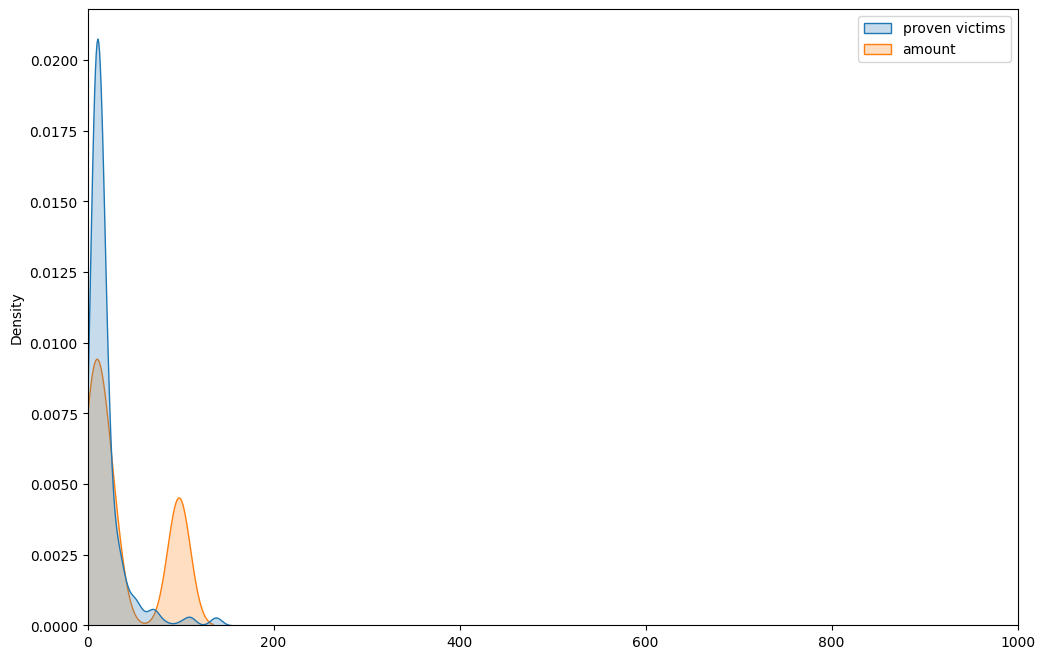

In [134]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df[['proven victims','amount']], shade=True);
plt.axis('tight')
plt.xlim(0,1000)

In [ ]:
sns.pairplot

Destacar solo esquinas, muchos asesinos en USA = pocas víctimas
vs pocos asesinos en Colombia, muchas víct

Text(58.347222222222214, 0.5, 'Number of victims')

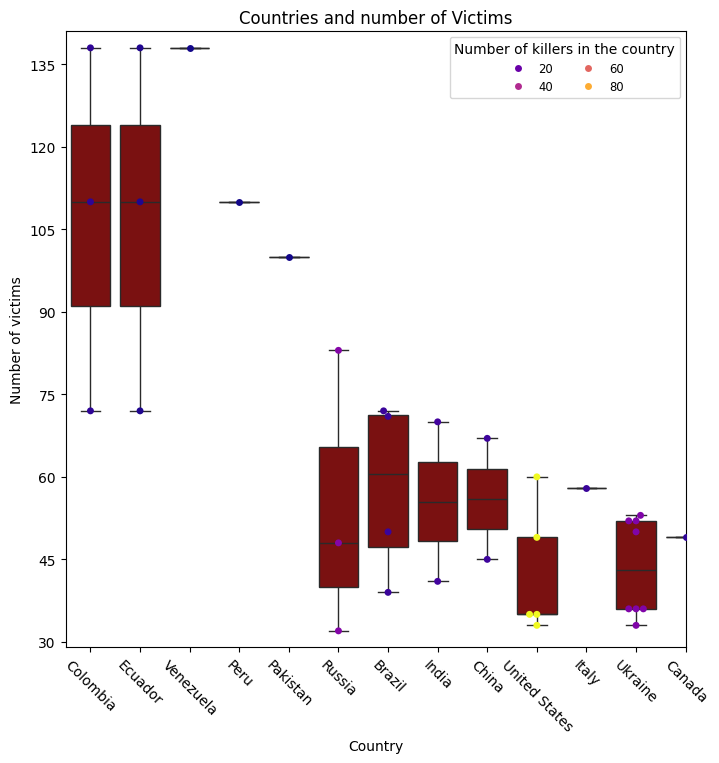

In [102]:
#repetir boxplot con countries > x
plt.figure(figsize=(8,8))
sns.boxplot(data=(df[df['proven victims']>30].sort_values(by='proven victims',ascending=False)), x='country',y='proven victims',color='darkred');
sns.swarmplot(data=(df[df['proven victims']>30].sort_values(by='proven victims',ascending=False)), x='country',y='proven victims', hue='amount',palette='plasma');
plt.xticks(rotation=-45);

legend = plt.legend(title="Number of killers in the country", #fontsize=8,
                    loc='upper right', fontsize='small', fancybox=True,ncol=2)

# plt.legend(loc = 'upper right', frameon = False, ncol = 2)
# plt.legend.set_title('Number of killers in the country')

plt.ylim(29,141)
plt.xlim(-0.5,'Canada')
plt.yticks(range(30,141,15))
plt.title('Countries and number of Victims')
plt.xlabel('Country')
plt.ylabel('Number of victims')

In [53]:
outliers=df[df['country'].isin(['Colombia', 'Ecuador','United States'])] #outliers

Text(58.347222222222214, 0.5, 'Number of victims')

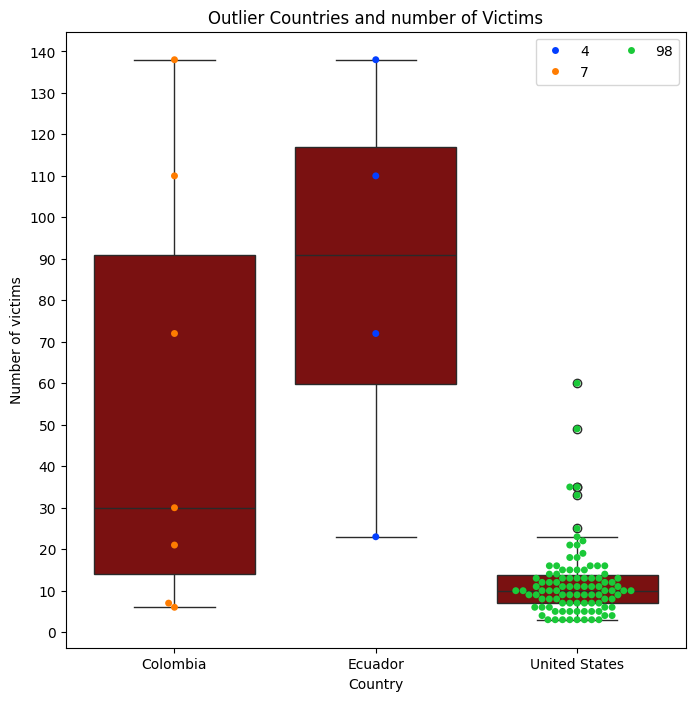

In [68]:
#repetir boxplot con countries > x
plt.figure(figsize=(8,8))
sns.boxplot(data=(outliers.sort_values(by='proven victims',ascending=False)), x='country',y='proven victims',color='darkred');
sns.swarmplot(data=outliers.sort_values(by='proven victims',ascending=False), x='country',y='proven victims', hue='amount',palette='bright');#, color='lightgray');
plt.legend(loc = 'upper right', frameon = True, ncol = 2)
# plt.ylim(29,141)
# plt.xlim(-0.5,'Canada')
plt.axis('tight')
plt.yticks(range(0,141,10))
plt.title('Outlier Countries and number of Victims')
plt.xlabel('Country')
plt.ylabel('Number of victims')

In [85]:
df['proven victims'].sum()/df['name'].count()
df['proven victims'].median()

12.0

(Confirmación)

In [59]:
maxvicpercountry=df.groupby('country')['proven victims'].max().sort_values(ascending=False)
maxvicpercountry
#max victims per country (hypothesis 4)

country
Venezuela         138
Colombia          138
Ecuador           138
Peru              110
Pakistan          100
Russia             83
Brazil             72
India              70
China              67
United States      60
Italy              58
Ukraine            53
Canada             49
Indonesia          42
South Africa       38
Morocco            36
Hungary            35
Romania            35
Serbia             35
Mexico             33
Iran               33
Iraq               33
Egypt              32
Germany            30
Swaziland          28
Greece             27
United Kingdom     26
France             23
Switzerland        23
Tajikistan         22
South Korea        21
Afghanistan        20
Costa Rica         19
Latvia             19
Turkey             18
Belgium            16
Spain              16
Argentina          15
Poland             14
Chile              14
Tunisia            13
Thailand           12
Malaysia           12
Japan              12
Nepal              12
Ye

<Axes: ylabel='country'>

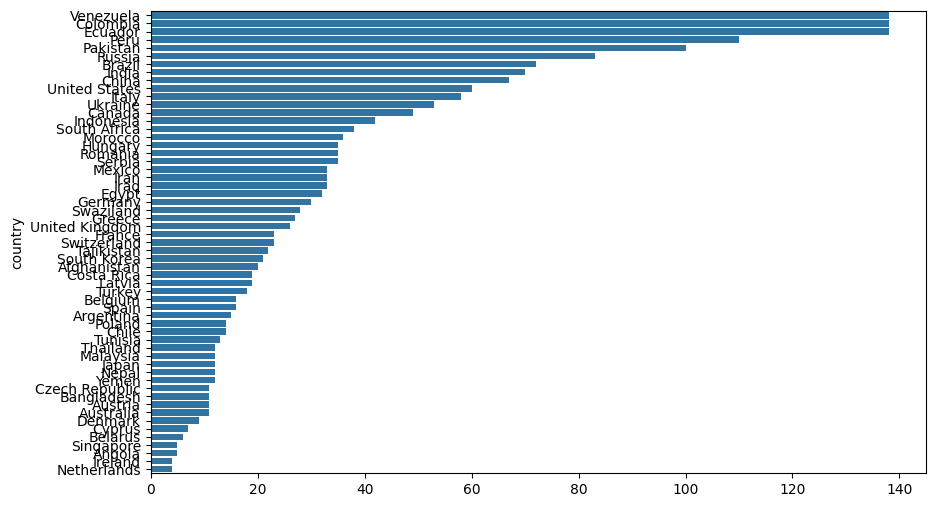

In [60]:
#barplot to show victim trends per country
plt.figure(figsize=(10,6))
sns.barplot(x=maxvicpercountry.values, y=maxvicpercountry.index)

In [61]:
df['country'].mode()

0    United States
Name: country, dtype: object

Moda=USA (98 asesinos de 355)

In [326]:
victimstats=df.groupby('country')['proven victims'].agg(['median','mean','max','min']).round(1).sort_values(by='median', ascending=False)
victimstats.reset_index(inplace=True)

In [327]:
victimstats

,country,median,mean,max,min
0,Ecuador,91.0,85.8,138,23
1,Venezuela,76.5,76.5,138,15
2,Peru,63.5,63.5,110,17
3,Pakistan,57.0,57.0,100,14
4,Morocco,36.0,36.0,36,36
5,Iraq,33.0,33.0,33,33
6,Egypt,32.0,32.0,32,32
7,Brazil,30.0,35.6,72,11
8,Colombia,30.0,54.9,138,6
9,Hungary,29.5,29.5,35,24


In [328]:
killerstats=df.groupby('country')['amount'].agg(['median','mean','max','min']).round(1).sort_values(by='median', ascending=False)
killerstats.reset_index(inplace=True)

In [329]:
killerstats

,country,median,mean,max,min
0,United States,98.0,98.0,98,98
1,Russia,27.0,27.0,27,27
2,Ukraine,26.0,26.0,26,26
3,South Africa,19.0,19.0,19,19
4,Germany,13.0,13.0,13,13
5,United Kingdom,13.0,13.0,13,13
6,France,12.0,12.0,12,12
7,India,11.0,11.0,11,11
8,China,10.0,10.0,10,10
9,Italy,9.0,9.0,9,9


In [332]:
# sns.pairplot(df,
#              hue='country')

In [339]:
stats=df.groupby('country')[['amount','proven victims']].agg({'proven victims': ['median','mean','max','min'], 'amount':'first'}).round(1).sort_values(by=('proven victims','median'), ascending=False)
stats.sort_values(by=).reset_index(inplace=True)


In [350]:
shortdf=df[(df['proven victims']>6)& (df['amount']>4)]

In [359]:
shstats=shortdf.groupby('country')[['amount','proven victims']].agg({'proven victims': ['median','mean','max','min'], 'amount':'first'}).round(1).sort_values(by=('proven victims','median'), ascending=False)
shstats.reset_index(inplace=True)


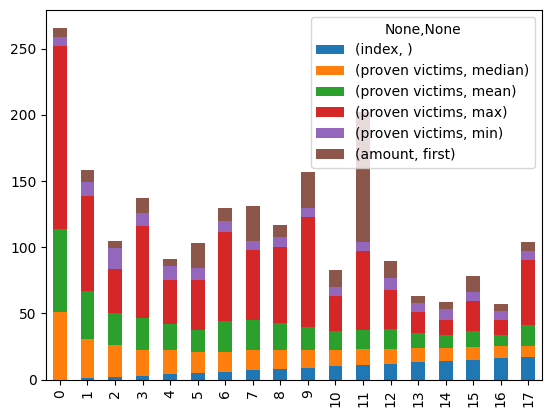

In [360]:
df_plot = shstats.reset_index()
df_plot.plot(kind='bar', stacked=True);

In [362]:
shstats

country proven victims                amount
                           median  mean  max min  first
0         Colombia           51.0  63.0  138   7      7
1           Brazil           30.0  35.6   72  11      9
2             Iran           24.0  24.4   33  16      5
3            India           19.0  24.2   70  10     11
4           Mexico           18.0  20.0   33  11      5
5     South Africa           16.0  16.3   38   9     19
6            China           15.0  23.6   67   8     10
7          Ukraine           15.0  22.9   53   7     26
8            Italy           14.5  20.0   58   7      9
9           Russia           13.0  17.9   83   7     27
10  United Kingdom           12.5  14.5   26   7     13
11   United States           12.0  14.2   60   7     98
12         Germany           11.0  14.9   30   9     13
13           Spain           11.0  11.0   16   7      5
14           Japan            9.5   9.8   12   8      5
15          France            9.5  11.8   23   7     12
16       Australia            9.0   9.0   11   7      5
17          Canada            8.0  16.1   49   7      7